In [1]:
%matplotlib inline

from pathlib import Path
import yaml

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import tifffile

root_dir = Path("/home/hadim/.data/Neural_Network/Maskflow/Shapes")
data_dir = root_dir / "Data"

model_name = "Shapes Detector"
saved_model_dir = root_dir / "SavedModels" / model_name

config_path = saved_model_dir / "assets.extra" / "config.yml"
config = yaml.load(open(config_path))

# Load data

In [2]:
# Get paths
image_paths = np.array([str(fname) for fname in sorted(data_dir.glob("*_original.tif"))])
mask_paths = np.array([str(fname) for fname in sorted(data_dir.glob("*_mask.tif"))])
class_ids_paths = np.array([str(fname) for fname in sorted(data_dir.glob("*_class_ids.csv"))])

# Prediction

In [3]:
# Load model and weights
predictor = tf.contrib.predictor.from_saved_model(str(saved_model_dir))

INFO:tensorflow:Restoring parameters from b'/home/hadim/.data/Neural_Network/Maskflow/Shapes/SavedModels/Shapes Detector/variables/variables'


True class: circle
Predicted class: square
['BG: 0.01', 'square: 0.56', 'circle: 0.24', 'triangle: 0.20']


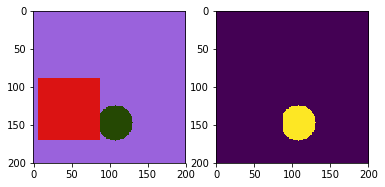

In [10]:
#data_id = 0
data_id += 1

# Load data
image = tifffile.imread(image_paths[data_id])
mask = tifffile.imread(mask_paths[data_id])
class_ids = pd.read_csv(class_ids_paths[data_id], header=None).values.T[0]

# Build inputs
inputs = {}
inputs["images"] = np.expand_dims(image, axis=0)
inputs["original_image_height"] = image.shape[0]
inputs["original_image_width"] = image.shape[1]
inputs["original_image_channel"] = image.shape[2]

# Run prediction
results = predictor(inputs)

# Display results
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(image)
axs[1].imshow(mask[:, :, 0])

true_class = config["CLASS_NAMES"][int(class_ids[0])]
predicted_class = config["CLASS_NAMES"][int(results["class_ids"][0])]

print(f"True class: {true_class}")
print(f"Predicted class: {predicted_class}")
print([f"{config['CLASS_NAMES'][i]}: {p:.2f}" for i, p in enumerate(results["probabilities"][0])])